# 1 Загрузка пакетов и библиотек

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif, chi2
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures

# 2 Загрузить данные из указанного источника

In [2]:
# Считываем данные по варианту
initial_data = pd.read_csv('V6.csv')
# Удаляем столбец, в соответсвии с заданием
data = initial_data.drop(columns = [' '], axis = 1) 

# 3 Выполнить разведочный анализ данных

## a) Ознакомление с данными с помощью методов описательной статистики
### Ознакомимся с первыми пятью строками, используя метод head()

In [3]:
data.head()

index  subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0      0         1   72    0     5.6431       28.199       34.398    0.00662   
1      1         1   72    0    12.6660       28.447       34.894    0.00300   
2      2         1   72    0    19.6810       28.695       35.389    0.00481   
3      3         1   72    0    25.6470       28.905       35.810    0.00528   
4      4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  ...  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.000034     0.00401  ...        0.230       0.01438       0.01309   
1     0.000017     0.00132  ...        0.179       0.00994       0.01072   
2          NaN     0.00205  ...        0.181       0.00734       0.00844   
3          NaN     0.00191  ...        0.327       0.01106       0.01265   
4     0.000020     0.00093  ...        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006  
1        0.01689      0.02982  0.011112  27.183  0.43493  0.56477  0.10810  
2        0.01458      0.02202  0.020220  23.047  0.46222  0.54405  0.21014  
3        0.01963      0.03317  0.027837  24.445  0.48730  0.57794  0.33277  
4        0.01819      0.02036  0.011625  26.126  0.47188  0.56122  0.19361  

[5 rows x 23 columns]

Каждая строка представляет собой набор из 19 измеренных показателей речи человека, страдающего от болезни Паркинсона.
Атрибуты age и sex, являются константами, так как не изменяются для каждого пациента(subject#) с последующими измерениями.
Можно заметить, что столбец "index" представляет из себя счетчик, поэтому удалим его из набора данных за ненадобностью.

In [4]:
data.drop(columns = ['index'], inplace=True) 
data.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2          NaN     0.00205      0.00208  ...        0.181       0.00734   
3          NaN     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

### Определим размерность набора данных и типы атрибутов в данных.

In [5]:
data.shape

(5875, 22)

In [6]:
data.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

### Получим краткое описание данных.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    2944 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Все атрибуты данной таблицы явлются числовыми.

Обратим внимание, что атрибут "Jitter(Abs)" имеет только 2944 ненулевых значений, т.е. ~ у половины пациентов упомянутый признак отсутствует.

In [8]:
data.drop(columns = ['Jitter(Abs)'], inplace=True) 

### Посмотрим сводку по числовым атрибутам.

In [9]:
data.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.002987     0.003277     0.008962  ...   
std      10.700283     0.005624     0.003124     0.003732     0.009371  ...   
min       7.000000     0.000830     0.000330     0.000430     0.000980  ...   
25%      21.371000     0.003580     0.001580     0.001820     0.004730  ...   
50%      27.576000     0.004900     0.002250     0.002490     0.006750  ...   
75%      36.399000     0.006800     0.003290     0.003460     0.009870  ...   
max      54.992000     0.099990     0.057540     0.069560     0.172630  ...   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5875.000000   5875.000000   5875.000000    5875.000000  5875.000000   
mean      0.310960      0.017156      0.020144       0.027481     0.051467   
std       0.230254      0.013237      0.016664       0.019986     0.039711   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.175000      0.009280      0.010790       0.015665     0.027830   
50%       0.253000      0.013700      0.015940       0.022710     0.041110   
75%       0.365000      0.020575      0.023755       0.032715     0.061735   
max       2.107000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.032120    21.679495     0.541473     0.653240     0.219589  
std       0.059692     4.291096     0.100986     0.070902     0.091498  
min       0.000286     1.659000     0.151020     0.514040     0.021983  
25%       0.010955    19.406000     0.469785     0.596180     0.156340  
50%       0.018448    21.920000     0.542250     0.643600     0.205500  
75%       0.031463    24.444000     0.614045     0.711335     0.264490  
max       0.748260    37.875000     0.966080     0.865600     0.731730  

[8 rows x 21 columns]

С помощью метода describe() можно быстро выяснить, что в исследованиях принимало участие 42 человека со средним возрастом ~65 лет. 
Обратим внимание, что в строке min атрибута test_time указано значение, меньшее 0, следовательно, исследование было произведено некорректно, причем, скорее всего, в нескольких случаях.

## b) Выполнить визуализацию данных: одномерную, для понимания распределения данных и многомерную, для выяснения зависимостей между признаками.

### Выполним визуализацию данных с помощью гистограмм.

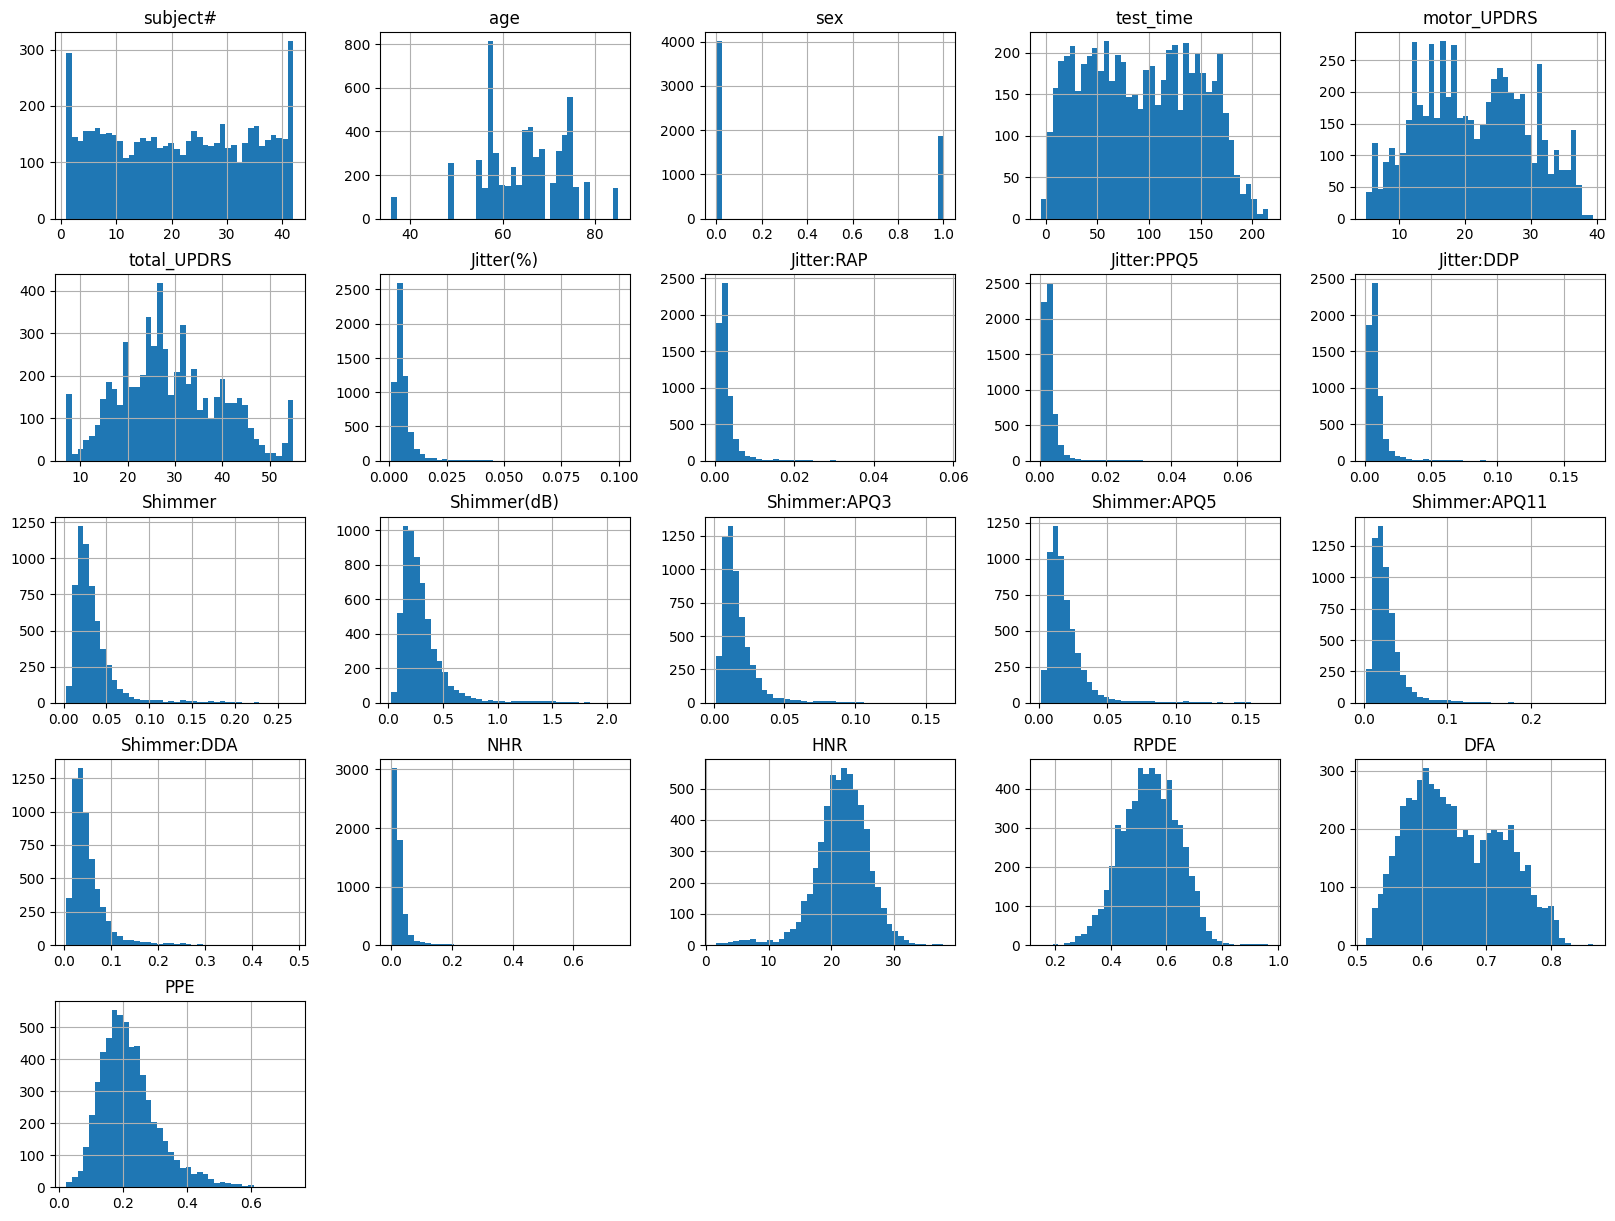

In [10]:
data.hist(bins=40, figsize=(20, 15))
plt.show()

Эти атрибуты имеют очень разные масштабы. В дальнешем мы их приведем к определенному масштабу.
Многие гистограммы имеют тяжелый хвост: они простираются намного дальше вправо от медианы, чем влево. Это может затруднить обнаружение шаблонов некоторыми алгоритмами машинного обучения. Необходимо попробовать преобразовать эти атрибуты, чтобы получить более колоколообразные распределения относительно медианы.

### Выполним визуализацию данных с помощью графиков плотности.

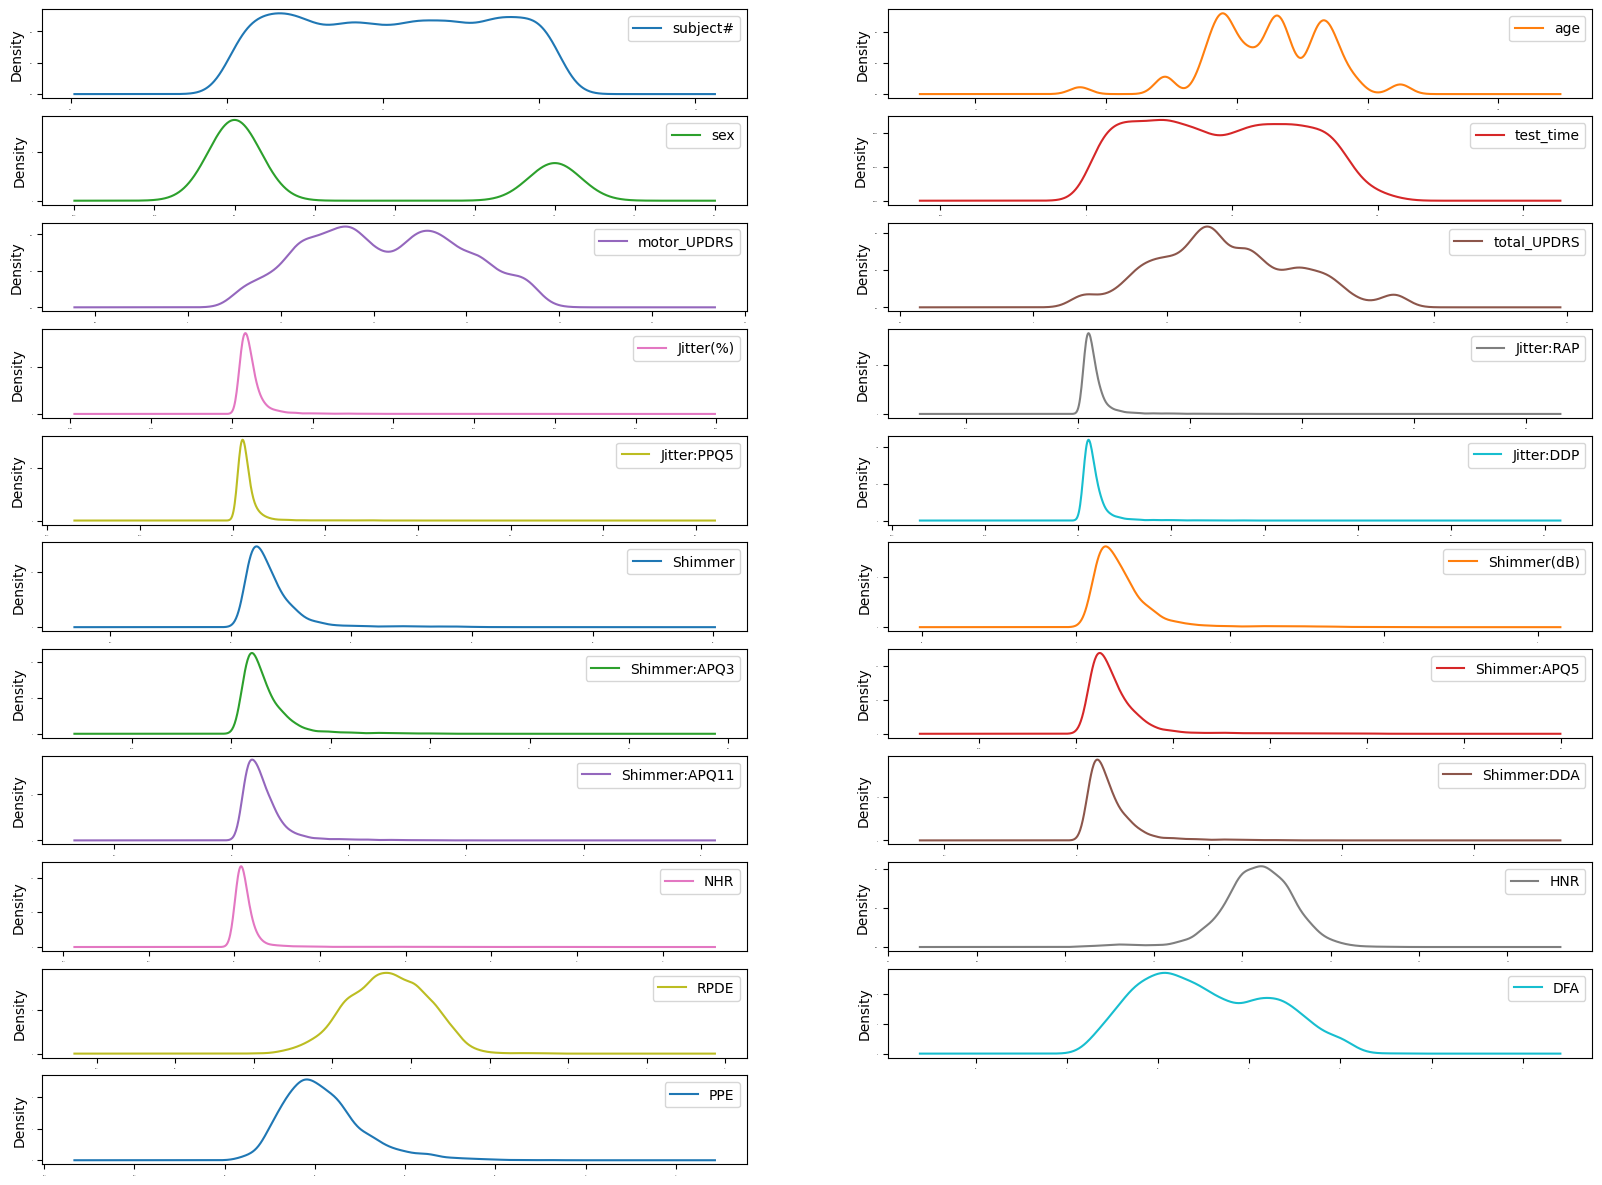

In [11]:
data.plot(kind = 'kde', subplots = True, layout = (11, 2), sharex  =False, legend = True, fontsize = 1, figsize = (20, 15))
plt.show()

Графики плотности показывают сглаженные гистограммы, приведенные выше. 

### Построим корреляционную матицу.

<AxesSubplot:title={'center':'Correlation Matrix'}>

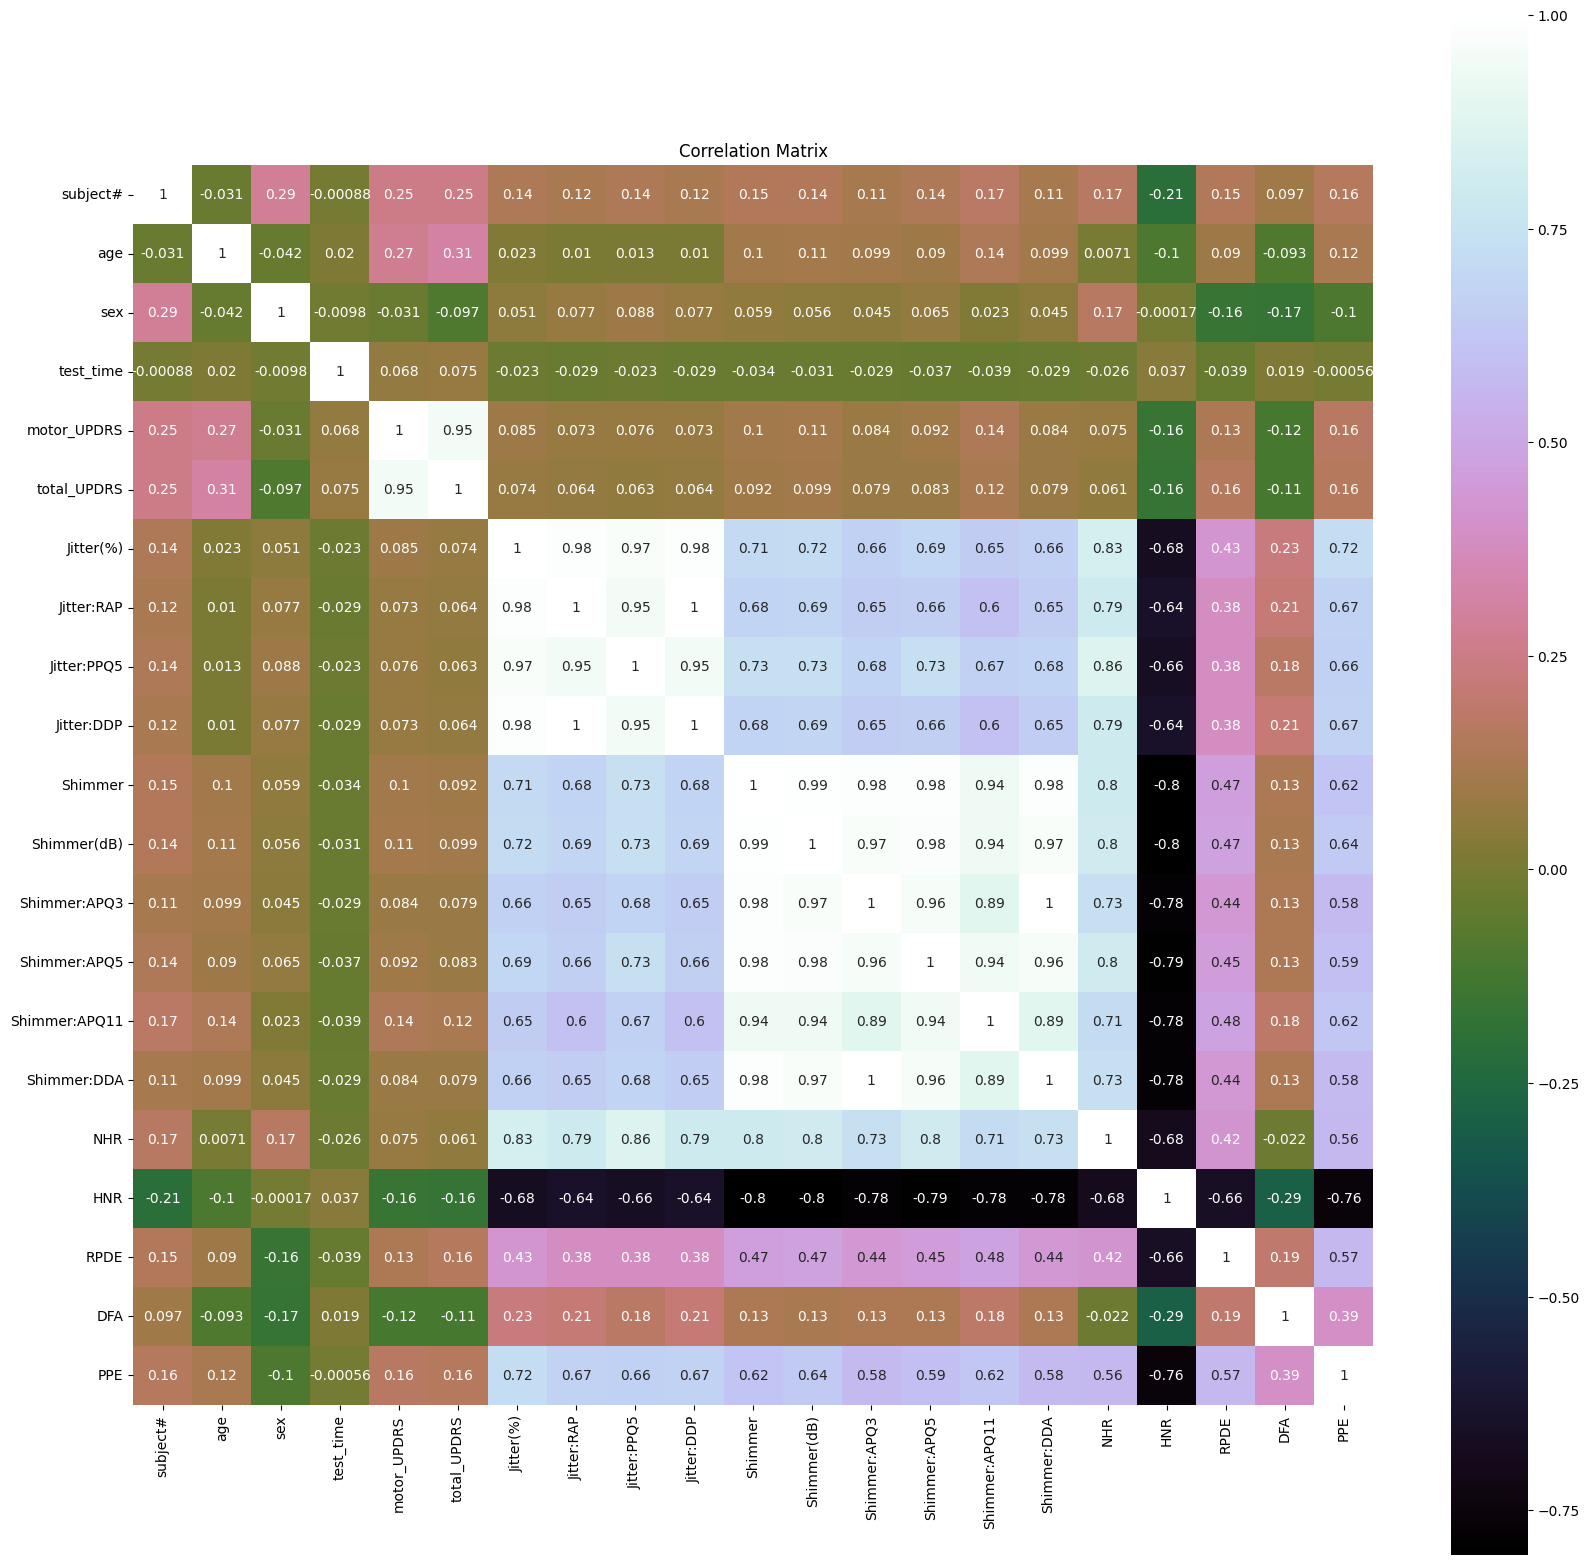

In [12]:
correlation = data.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='cubehelix')

 С помощью  данной таблицы прослеживается связь между атрибутами.
 Можно заметить, что часть атрибутов совершенно независима друг от друга, действительно, объект исследования(#subject), возраст(age) и пол(sex) не могут ни с чем коррелировать, так как в большинстве своем это константы, как мы указывали ранее. В центральной части мы наблюдаем более светлые тона, что говорит нам о значениях, близких к прямой пропорциональной зависимости, а строка и столбец HNR, напротив, говорит нам о практически прямой обратной зависимости от остальных аргументов.


In [13]:
print(correlation)

               subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000 -0.030864  0.286851  -0.000882     0.252919   
age           -0.030864  1.000000 -0.041602   0.019884     0.273665   
sex            0.286851 -0.041602  1.000000  -0.009805    -0.031205   
test_time     -0.000882  0.019884 -0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665 -0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290 -0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422  -0.022837     0.084816   
Jitter:RAP     0.120339  0.010255  0.076718  -0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995  -0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703  -0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736  -0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481  -0.030962     0.110076   
Shimmer:APQ3   0.112950  0.098912  0.044937  -0.029020     0.084261   
Shimme

### Построим матрицу диаграммы рассеивания (по диагонали гистограммы).

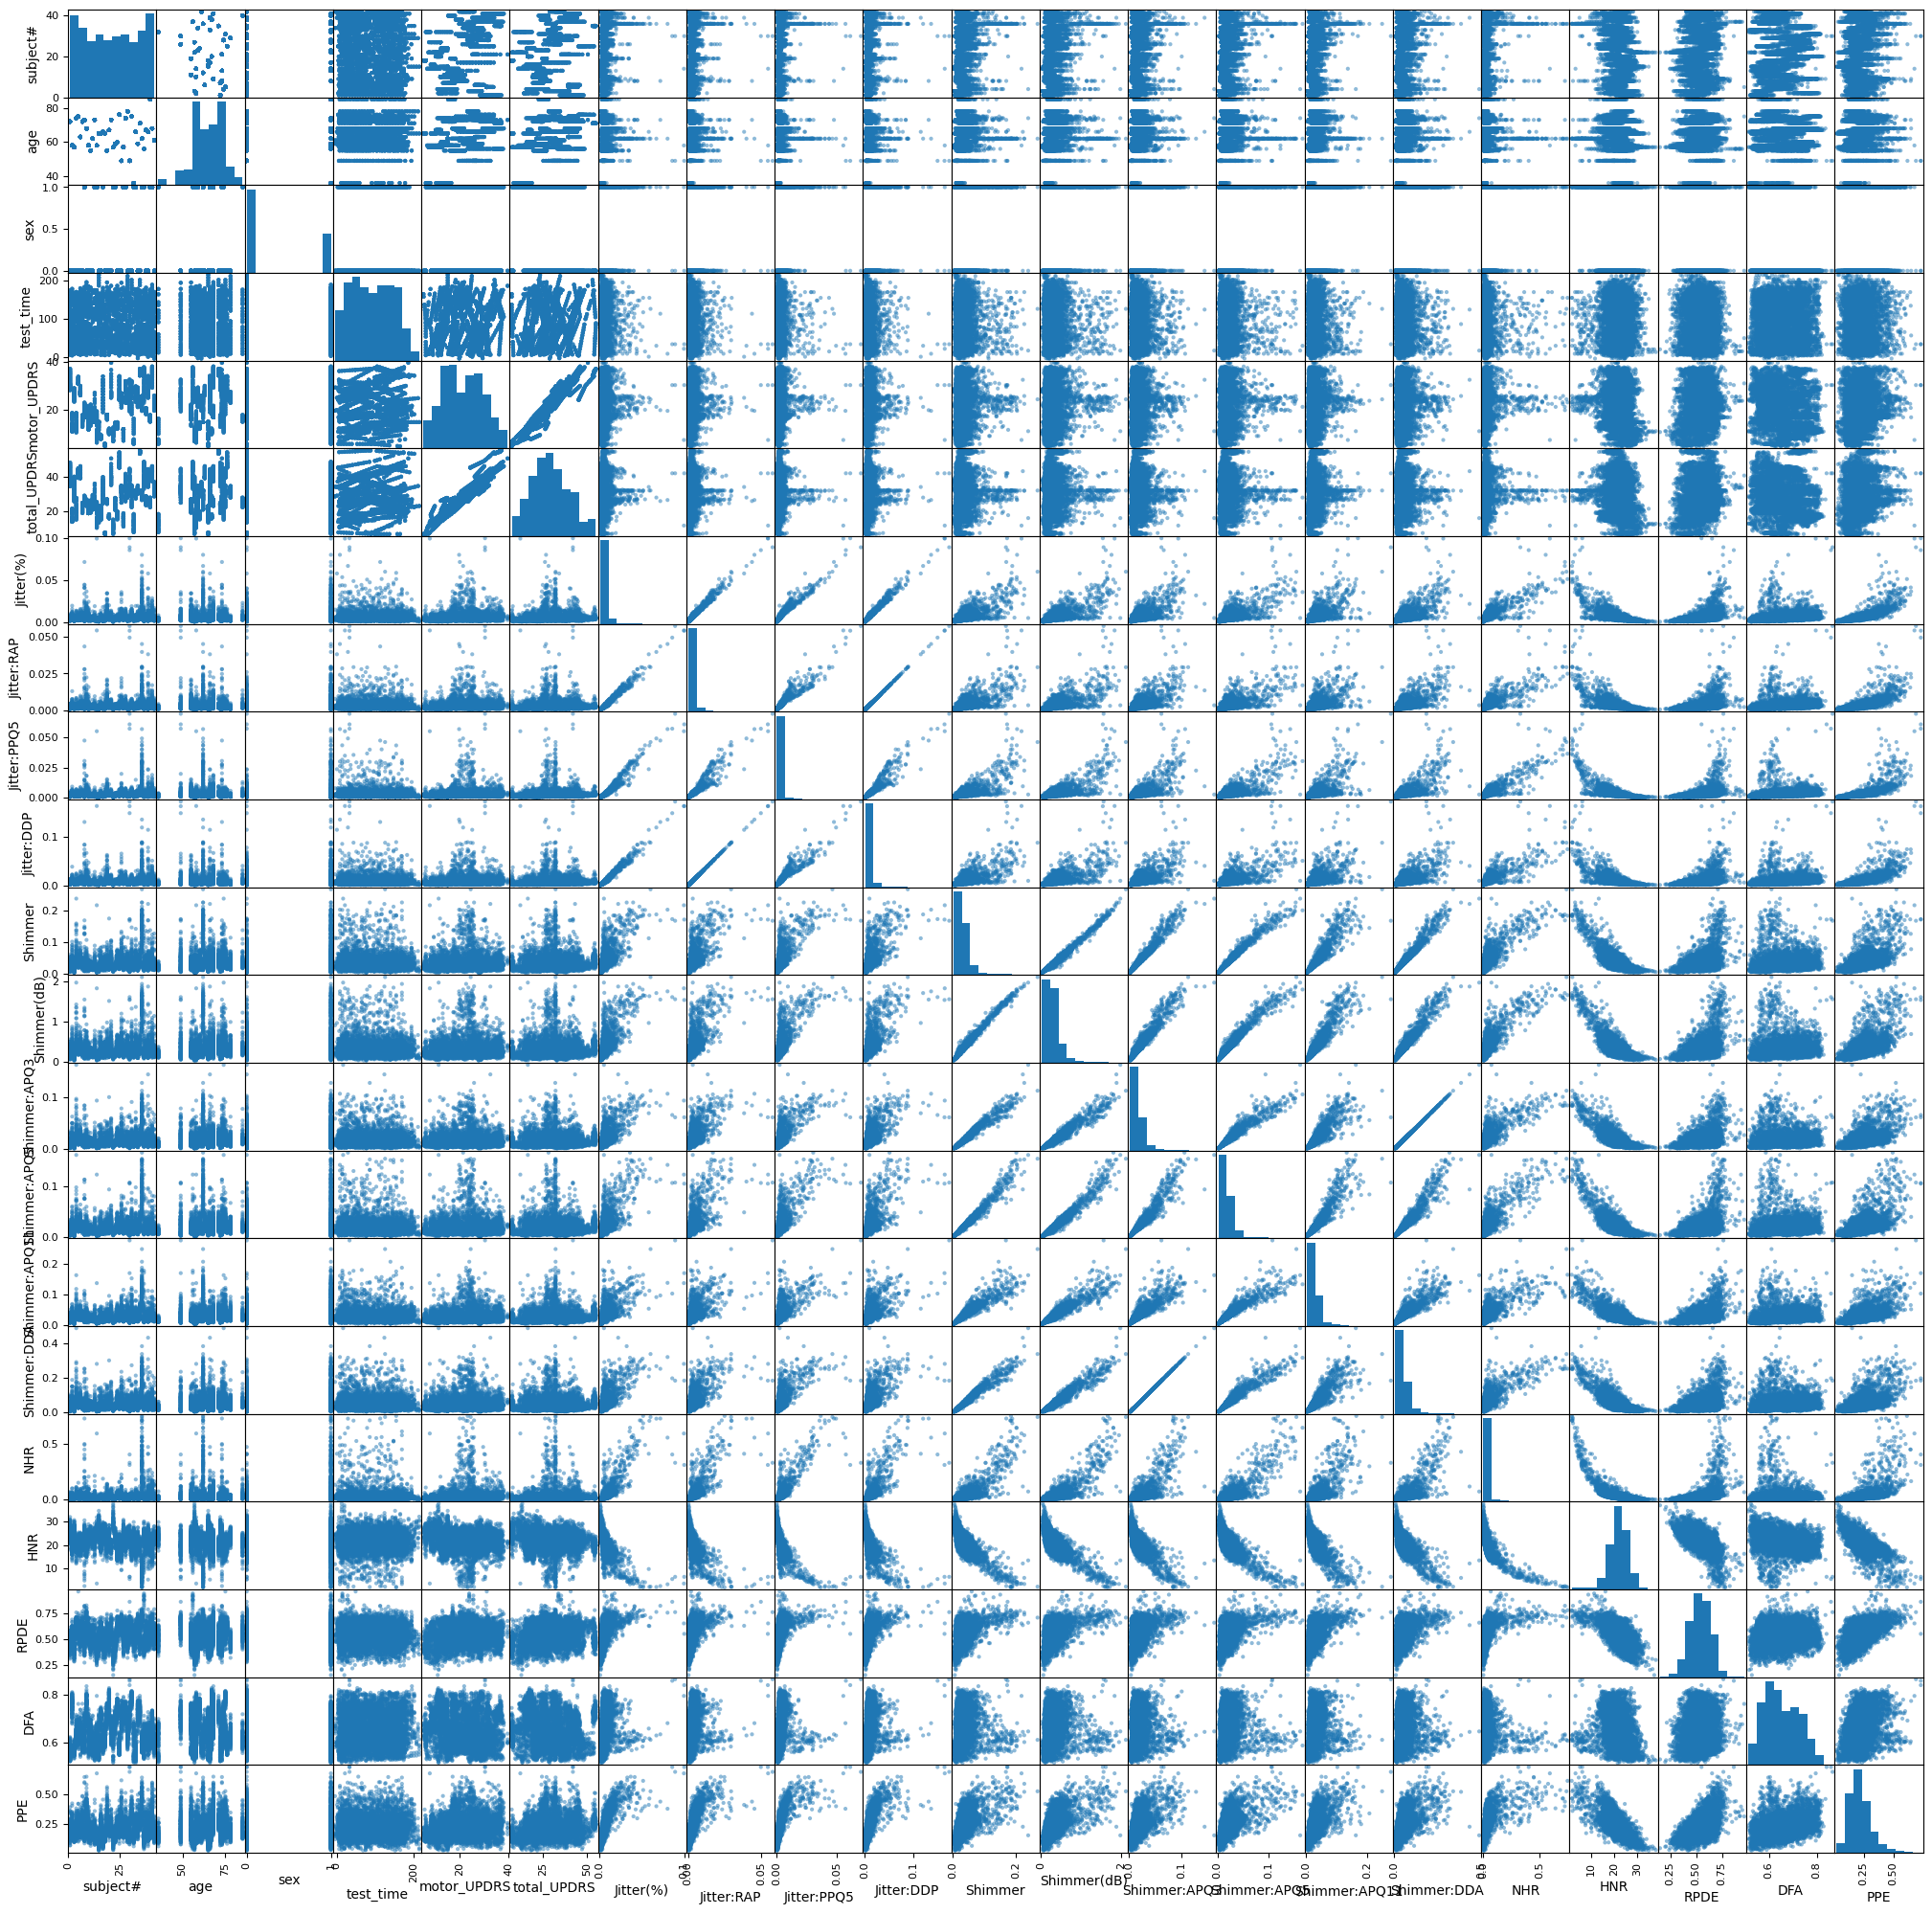

In [14]:
pd.plotting.scatter_matrix(data,figsize=(25,25))
plt.show()

Матрица диаграммы рассеяния также позволяет визуализировать связь между переменными.

### Построим матрицу диаграммы рассеивания (по диагонали плотности распределения).

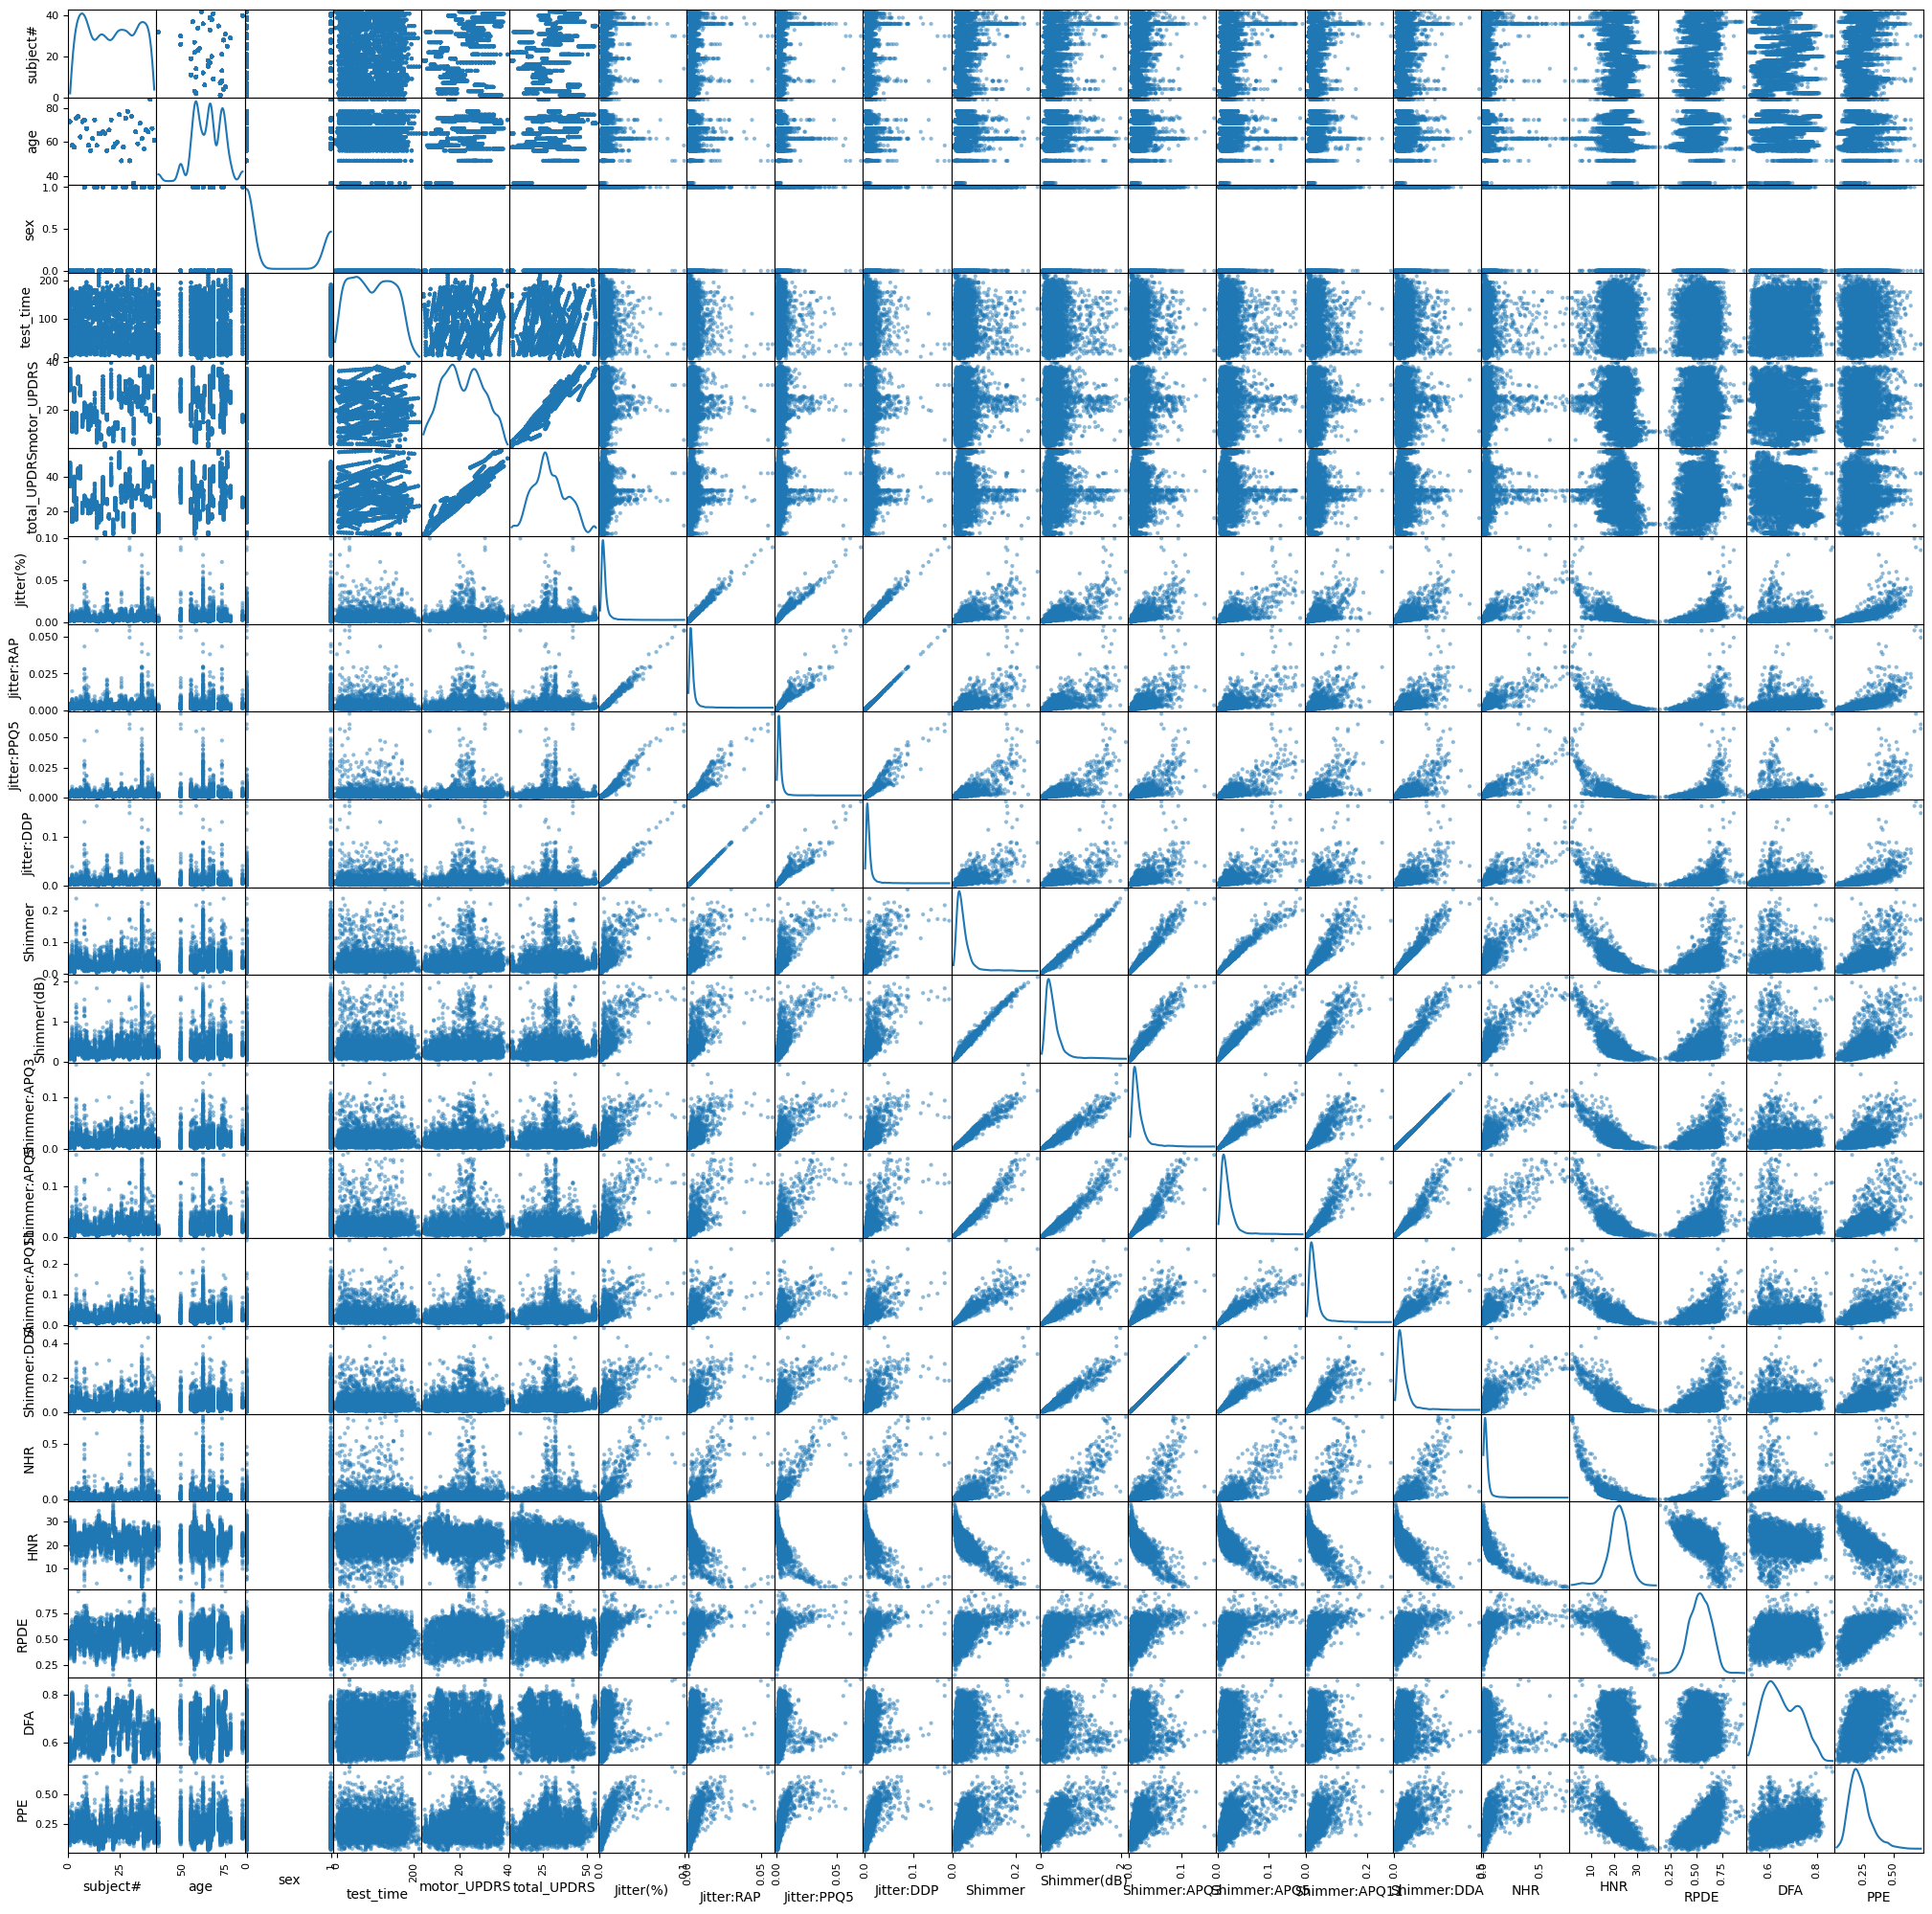

In [15]:
pd.plotting.scatter_matrix(data, figsize=(25,25), diagonal='kde')
plt.show()

## c) Проанализировать корреляционную зависимость между признаками.


### Вычислим стандартный коэффициент корреляции между каждой парой атрибутов

In [16]:
#коэффициент корреляции Пирсона(r)
corr_matrix = data.corr()
corr_matrix

subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000 -0.030864  0.286851  -0.000882     0.252919   
age           -0.030864  1.000000 -0.041602   0.019884     0.273665   
sex            0.286851 -0.041602  1.000000  -0.009805    -0.031205   
test_time     -0.000882  0.019884 -0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665 -0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290 -0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422  -0.022837     0.084816   
Jitter:RAP     0.120339  0.010255  0.076718  -0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995  -0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703  -0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736  -0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481  -0.030962     0.110076   
Shimmer:APQ3   0.112950  0.098912  0.044937  -0.029020     0.084261   
Shimmer:APQ5   0.138264  0.089983  0.064819  -0.036504     0.092105   
Shimmer:APQ11  0.173333  0.135238  0.023360  -0.039110     0.136560   
Shimmer:DDA    0.112949  0.098913  0.044938  -0.029017     0.084260   
NHR            0.168743  0.007093  0.168170  -0.026357     0.074967   
HNR           -0.206929 -0.104842 -0.000167   0.036545    -0.157029   
RPDE           0.147300  0.090208 -0.159262  -0.038887     0.128607   
DFA            0.097464 -0.092870 -0.165113   0.019261    -0.116242   
PPE            0.157559  0.120790 -0.099901  -0.000563     0.162433   

               total_UPDRS  Jitter(%)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  \
subject#          0.253643   0.135448    0.120339     0.136474    0.120350   
age               0.310290   0.023071    0.010255     0.013199    0.010258   
sex              -0.096559   0.051422    0.076718     0.087995    0.076703   
test_time         0.075263  -0.022837   -0.028888    -0.023290   -0.028876   
motor_UPDRS       0.947231   0.084816    0.072684     0.076291    0.072698   
total_UPDRS       1.000000   0.074247    0.064015     0.063352    0.064027   
Jitter(%)         0.074247   1.000000    0.984181     0.968214    0.984184   
Jitter:RAP        0.064015   0.984181    1.000000     0.947196    1.000000   
Jitter:PPQ5       0.063352   0.968214    0.947196     1.000000    0.947203   
Jitter:DDP        0.064027   0.984184    1.000000     0.947203    1.000000   
Shimmer           0.092141   0.709791    0.681729     0.732747    0.681734   
Shimmer(dB)       0.098790   0.716704    0.685551     0.734591    0.685556   
Shimmer:APQ3      0.079363   0.664149    0.650226     0.676711    0.650228   
Shimmer:APQ5      0.083467   0.694002    0.659831     0.734021    0.659833   
Shimmer:APQ11     0.120838   0.645965    0.603082     0.668413    0.603090   
Shimmer:DDA       0.079363   0.664147    0.650225     0.676710    0.650227   
NHR               0.060952   0.825294    0.792373     0.864864    0.792377   
HNR              -0.162117  -0.675188   -0.641473    -0.662409   -0.641482   
RPDE              0.156897   0.427128    0.382891     0.381503    0.382886   
DFA              -0.113475   0.226550    0.214881     0.175359    0.214893   
PPE               0.156195   0.721849    0.670652     0.663491    0.670660   

               ...  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  \
subject#       ...     0.142864      0.112950      0.138264       0.173333   
age            ...     0.111130      0.098912      0.089983       0.135238   
sex            ...     0.056481      0.044937      0.064819       0.023360   
test_time      ...    -0.030962     -0.029020     -0.036504      -0.039110   
motor_UPDRS    ...     0.110076      0.084261      0.092105       0.136560   
total_UPDRS    ...     0.098790      0.079363      0.083467       0.120838   
Jitter(%)      ...     0.716704      0.664149      0.694002       0.645965   
Jitter:RAP     ...     0.685551      0.650226      0.659831       0.603082   
Jitter:PPQ5    ...     0.734591  

### Посмотрим, насколько каждый атрибут связан со шкалой единой оценки болезни Паркинсона

In [17]:
corr_matrix["total_UPDRS"].sort_values(ascending=False)

total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
subject#         0.253643
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64

### Построим матрицу диаграммы рассеивания (по диагонали гистограммы) для атрибутов, которые наиболее связаны с критерием total_UPDRS 
Было принято решение взять атрибуты, модуль к-та корреляции которых больше 0.15

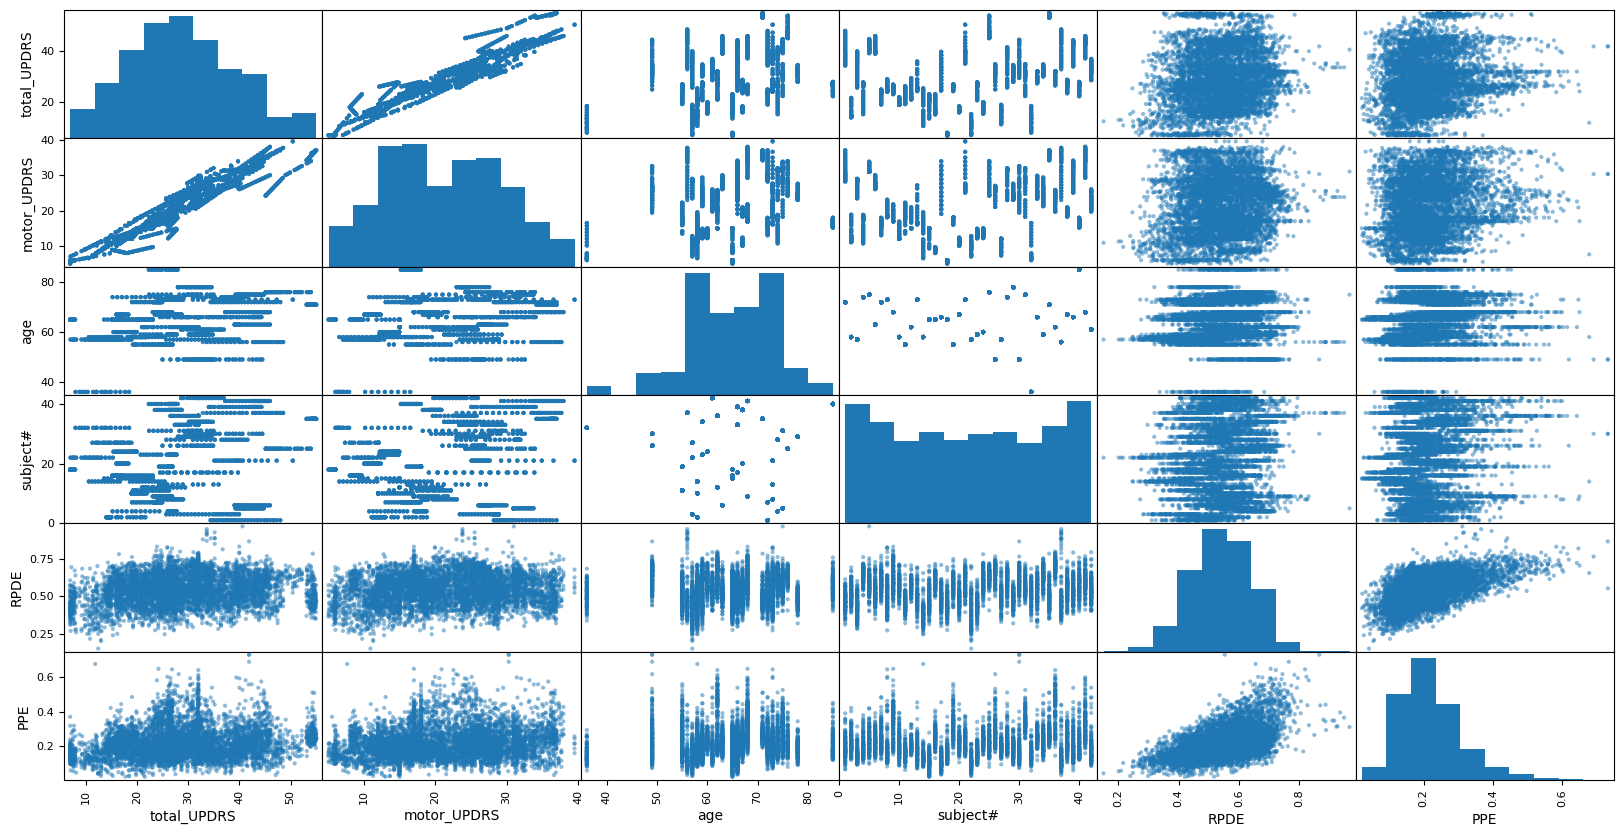

In [18]:
attributes = ["total_UPDRS","motor_UPDRS", "age", "subject#", "RPDE","PPE"]
pd.plotting.scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

### Многообещающим атрибутом для прогнозирования оценки болезни Паркинсона является возраст. 

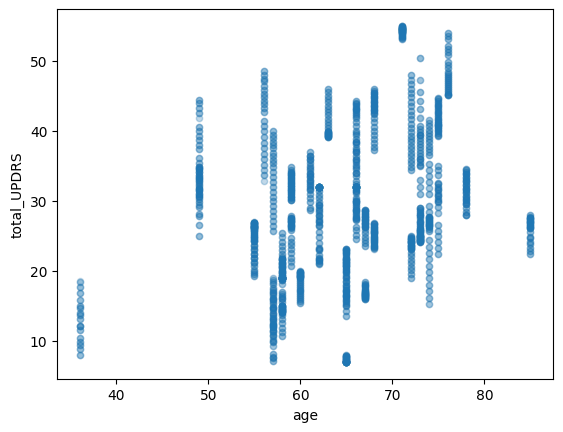

In [19]:
data.plot(kind="scatter", x="age", y="total_UPDRS", alpha=0.1)
plt.show()

## d) Поэкспериментировать с комбинациями атрибутов. При необходимости добавить новые атрибуты в набор данных.

In [20]:
#Creating new attributes
data["RPDE_Jitter(%)"] = data["RPDE"]/data["Jitter(%)"]
data["RPDE_Jitter(DDP)"] = data["RPDE"]/data["Jitter:DDP"]
corr_matrix = data.corr()
corr_matrix["total_UPDRS"].sort_values(ascending=False)

total_UPDRS         1.000000
motor_UPDRS         0.947231
age                 0.310290
subject#            0.253643
RPDE                0.156897
PPE                 0.156195
Shimmer:APQ11       0.120838
Shimmer(dB)         0.098790
Shimmer             0.092141
Shimmer:APQ5        0.083467
Shimmer:DDA         0.079363
Shimmer:APQ3        0.079363
test_time           0.075263
Jitter(%)           0.074247
Jitter:DDP          0.064027
Jitter:RAP          0.064015
Jitter:PPQ5         0.063352
NHR                 0.060952
RPDE_Jitter(DDP)   -0.070489
RPDE_Jitter(%)     -0.095090
sex                -0.096559
DFA                -0.113475
HNR                -0.162117
Name: total_UPDRS, dtype: float64

При экспериментах с комбинациями не было выявлено улучшения корреляций между исходными аттрибутами, следовательно, оcтавим исходные аттрибуты, как есть.

## e) При необходимости выполнить очистку данных одним из методов

In [21]:
# Удалим атрибуты, введенные в прошлом пункте
data = data.drop(columns = ["RPDE_Jitter(%)","RPDE_Jitter(DDP)"], axis = 1) 
# А также атрибут, в котором есть нулевые значения
changed_data = data.drop(columns = ["subject#"], axis = 1) 
changed_data

age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter:RAP  \
0      72    0     5.6431       28.199       34.398    0.00662     0.00401   
1      72    0    12.6660       28.447       34.894    0.00300     0.00132   
2      72    0    19.6810       28.695       35.389    0.00481     0.00205   
3      72    0    25.6470       28.905       35.810    0.00528     0.00191   
4      72    0    33.6420       29.187       36.375    0.00335     0.00093   
...   ...  ...        ...          ...          ...        ...         ...   
5870   61    0   142.7900       22.485       33.485    0.00406     0.00167   
5871   61    0   149.8400       21.988       32.988    0.00297     0.00119   
5872   61    0   156.8200       21.495       32.495    0.00349     0.00152   
5873   61    0   163.7300       21.007       32.007    0.00281     0.00128   
5874   61    0   170.7300       20.513       31.513    0.00282     0.00135   

      Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  \
0         0.00317     0.01204  0.02565        0.230       0.01438   
1         0.00150     0.00395  0.02024        0.179       0.00994   
2         0.00208     0.00616  0.01675        0.181       0.00734   
3         0.00264     0.00573  0.02309        0.327       0.01106   
4         0.00130     0.00278  0.01703        0.176       0.00679   
...           ...         ...      ...          ...           ...   
5870      0.00168     0.00500  0.01896        0.160       0.00973   
5871      0.00147     0.00358  0.02315        0.215       0.01052   
5872      0.00187     0.00456  0.02499        0.244       0.01371   
5873      0.00151     0.00383  0.01484        0.131       0.00693   
5874      0.00166     0.00406  0.01907        0.171       0.00946   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0          0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1          0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2          0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3          0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4          0.00929        0.01819      0.02036  0.011625  26.126  0.47188   
...            ...            ...          ...       ...     ...      ...   
5870       0.01133        0.01549      0.02920  0.025137  22.369  0.64215   
5871       0.01277        0.01904      0.03157  0.011927  22.886  0.52598   
5872       0.01456        0.01877      0.04112  0.017701  25.065  0.47792   
5873       0.00870        0.01307      0.02078  0.007984  24.422  0.56865   
5874       0.01154        0.01470      0.02839  0.008172  23.259  0.58608   

          DFA      PPE  
0     0.54842  0.16006  
1     0.56477  0.10810  
2     0.54405  0.21014  
3     0.57794  0.33277  
4     0.56122  0.19361  
...       ...      ...  
5870  0.55314  0.21367  
5871  0.56518  0.12621  
5872  0.57888  0.14157  
5873  0.56327  0.14204  
5874  0.57077  0.15336  

[5875 rows x 20 columns]

## f) Выполнить отбор существенных признаков. Сформировать набор данных из существенных признаков.

### Выберем лучшие признаки с помощью функции SelectKBest

In [22]:
data_X = changed_data.iloc[::]
data_X = data_X.drop(columns=['total_UPDRS'], axis = 1)
data_Y = changed_data["total_UPDRS"]

bestfeatures = SelectKBest(mutual_info_regression, k=5)
fit = bestfeatures.fit(data_X, data_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores

0         0
0             age  3.019318
1             sex  0.608767
2       test_time  6.779662
3     motor_UPDRS  6.559603
4       Jitter(%)  0.080378
5      Jitter:RAP  0.075108
6     Jitter:PPQ5  0.114055
7      Jitter:DDP  0.080056
8         Shimmer  0.097536
9     Shimmer(dB)  0.083823
10   Shimmer:APQ3  0.085891
11   Shimmer:APQ5  0.096810
12  Shimmer:APQ11  0.107630
13    Shimmer:DDA  0.085813
14            NHR  0.075405
15            HNR  0.123608
16           RPDE  0.086810
17            DFA  0.193309
18            PPE  0.101447

Таким образом, наиболее информативными признаками являются: age, sex, test_time и motor_UPDRS. Однако, беря во внимание результаты корреляции, было принято решение оставить также признаки HNR, DFA, PPE, RPDE, а также NHR.

In [23]:
changed_data.drop(['Jitter(%)','Jitter:PPQ5','Jitter:RAP','Jitter:DDP','Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA',],
                  axis=1, inplace=True)
changed_data

age  sex  test_time  motor_UPDRS  total_UPDRS       NHR     HNR  \
0      72    0     5.6431       28.199       34.398  0.014290  21.640   
1      72    0    12.6660       28.447       34.894  0.011112  27.183   
2      72    0    19.6810       28.695       35.389  0.020220  23.047   
3      72    0    25.6470       28.905       35.810  0.027837  24.445   
4      72    0    33.6420       29.187       36.375  0.011625  26.126   
...   ...  ...        ...          ...          ...       ...     ...   
5870   61    0   142.7900       22.485       33.485  0.025137  22.369   
5871   61    0   149.8400       21.988       32.988  0.011927  22.886   
5872   61    0   156.8200       21.495       32.495  0.017701  25.065   
5873   61    0   163.7300       21.007       32.007  0.007984  24.422   
5874   61    0   170.7300       20.513       31.513  0.008172  23.259   

         RPDE      DFA      PPE  
0     0.41888  0.54842  0.16006  
1     0.43493  0.56477  0.10810  
2     0.46222  0.54405  0.21014  
3     0.48730  0.57794  0.33277  
4     0.47188  0.56122  0.19361  
...       ...      ...      ...  
5870  0.64215  0.55314  0.21367  
5871  0.52598  0.56518  0.12621  
5872  0.47792  0.57888  0.14157  
5873  0.56865  0.56327  0.14204  
5874  0.58608  0.57077  0.15336  

[5875 rows x 10 columns]

## g) При необходимости преобразовать текстовые или категориальные признаки одним из методов


В наборе отсутствуют текстовые и категориальные признаки

## h) Выполнить преобразование данных для обоих наборов (исходного и сформированного) одним из методов по варианту. (Стандартизация)

In [24]:
# Преобразовываем исходный набор
scaler = StandardScaler().fit(data)
Standardised_data = pd.DataFrame(scaler.fit_transform(data))
Standardised_data



0         1         2         3         4         5         6   \
0    -1.656596  0.815695 -0.682509 -1.632090  0.849197  0.502745  0.082905   
1    -1.656596  0.815695 -0.682509 -1.500676  0.879706  0.549103 -0.560793   
2    -1.656596  0.815695 -0.682509 -1.369410  0.910216  0.595367 -0.238944   
3    -1.656596  0.815695 -0.682509 -1.257773  0.936051  0.634716 -0.155370   
4    -1.656596  0.815695 -0.682509 -1.108169  0.970743  0.687522 -0.498557   
...        ...       ...       ...       ...       ...       ...       ...   
5870  1.657546 -0.431361 -0.682509  0.934231  0.146246  0.417413 -0.372307   
5871  1.657546 -0.431361 -0.682509  1.066152  0.085104  0.370962 -0.566128   
5872  1.657546 -0.431361 -0.682509  1.196763  0.024453  0.324884 -0.473663   
5873  1.657546 -0.431361 -0.682509  1.326064 -0.035582  0.279274 -0.594579   
5874  1.657546 -0.431361 -0.682509  1.457050 -0.096355  0.233103 -0.592801   

            7         8         9   ...        11        12        13  \
0     0.327453 -0.028637  0.328505  ... -0.351642 -0.209709 -0.423356   
1    -0.533746 -0.476212 -0.534825  ... -0.573156 -0.545158 -0.565592   
2    -0.300038 -0.320767 -0.298983  ... -0.564469 -0.741592 -0.702426   
3    -0.344859 -0.170682 -0.344871  ...  0.069668 -0.460540 -0.449763   
4    -0.658604 -0.529814 -0.659682  ... -0.586186 -0.783145 -0.651413   
...        ...       ...       ...  ...       ...       ...       ...   
5870 -0.421694 -0.427970 -0.422773  ... -0.655681 -0.561024 -0.528983   
5871 -0.575365 -0.484252 -0.574309  ... -0.416793 -0.501338 -0.442561   
5872 -0.469717 -0.377049 -0.469728  ... -0.290834 -0.260328 -0.335135   
5873 -0.546552 -0.473532 -0.547630  ... -0.781639 -0.772568 -0.686822   
5874 -0.524142 -0.433331 -0.523086  ... -0.607903 -0.581423 -0.516380   

            14        15        16        17        18        19        20  
0    -0.543466 -0.209704 -0.298721 -0.009205 -1.214066 -1.478500 -0.650658  
1    -0.529955 -0.545153 -0.351965  1.282650 -1.055119 -1.247880 -1.218585  
2    -0.645545 -0.741587 -0.199370  0.318711 -0.784860 -1.540139 -0.103280  
3    -0.392849 -0.460787 -0.071754  0.644530 -0.536487 -1.062115  1.237075  
4    -0.464905 -0.783392 -0.343370  1.036305 -0.689195 -1.297953 -0.283954  
...        ...       ...       ...       ...       ...       ...       ...  
5870 -0.600010 -0.560767 -0.116990  0.160696  0.997028 -1.411923 -0.064697  
5871 -0.422372 -0.501081 -0.338311  0.281189 -0.153430 -1.242097 -1.020641  
5872 -0.435882 -0.260576 -0.241573  0.789028 -0.629379 -1.048856 -0.852755  
5873 -0.721104 -0.772815 -0.404372  0.639170  0.269141 -1.269038 -0.847618  
5874 -0.639540 -0.581166 -0.401222  0.368120  0.441754 -1.163249 -0.723890  

[5875 rows x 21 columns]

In [25]:
# Преобразовываем набор данных из существенных признаков
scaler = StandardScaler().fit(changed_data)
Standardised_changed_data = pd.DataFrame(scaler.fit_transform(changed_data))
Standardised_changed_data

0         1         2         3         4         5         6  \
0     0.815695 -0.682509 -1.632090  0.849197  0.502745 -0.298721 -0.009205   
1     0.815695 -0.682509 -1.500676  0.879706  0.549103 -0.351965  1.282650   
2     0.815695 -0.682509 -1.369410  0.910216  0.595367 -0.199370  0.318711   
3     0.815695 -0.682509 -1.257773  0.936051  0.634716 -0.071754  0.644530   
4     0.815695 -0.682509 -1.108169  0.970743  0.687522 -0.343370  1.036305   
...        ...       ...       ...       ...       ...       ...       ...   
5870 -0.431361 -0.682509  0.934231  0.146246  0.417413 -0.116990  0.160696   
5871 -0.431361 -0.682509  1.066152  0.085104  0.370962 -0.338311  0.281189   
5872 -0.431361 -0.682509  1.196763  0.024453  0.324884 -0.241573  0.789028   
5873 -0.431361 -0.682509  1.326064 -0.035582  0.279274 -0.404372  0.639170   
5874 -0.431361 -0.682509  1.457050 -0.096355  0.233103 -0.401222  0.368120   

             7         8         9  
0    -1.214066 -1.478500 -0.650658  
1    -1.055119 -1.247880 -1.218585  
2    -0.784860 -1.540139 -0.103280  
3    -0.536487 -1.062115  1.237075  
4    -0.689195 -1.297953 -0.283954  
...        ...       ...       ...  
5870  0.997028 -1.411923 -0.064697  
5871 -0.153430 -1.242097 -1.020641  
5872 -0.629379 -1.048856 -0.852755  
5873  0.269141 -1.269038 -0.847618  
5874  0.441754 -1.163249 -0.723890  

[5875 rows x 10 columns]

# 4 В имеющихся двух наборах данных (исходном и их существенных признаков)выделить обучающую и тестовую выборки данных.

### Выделение обучающих и тестовых выборок для НЕСТАНДАРТИЗИРОВАННЫХ данных 

In [26]:
test_size = 0.2
seed = 7

data_X = data.drop('total_UPDRS', axis=1)
data_Y = data['total_UPDRS']

data_X_train, data_X_test, data_Y_train, data_Y_test =\
train_test_split(data_X, data_Y, test_size=test_size, random_state=seed)
#data_X_train.info()

changed_data_X = changed_data.drop('total_UPDRS', axis=1)
changed_data_Y = changed_data['total_UPDRS']

changed_data_X_train, changed_data_X_test, changed_data_Y_train, changed_data_Y_test =\
train_test_split(changed_data_X, changed_data_Y, test_size=test_size, random_state=seed)
#changed_data_X_train.info()


### Выделение обучающих и тестовых выборок для СТАНДАРТИЗИРОВАННЫХ данных

In [27]:
test_size = 0.2
seed = 7

Standardised_data_X = Standardised_data.drop(5, axis=1)
Standardised_data_Y = Standardised_data[5]

Standardised_data_X_train, Standardised_data_X_test, Standardised_data_Y_train, Standardised_data_Y_test =\
train_test_split(Standardised_data_X, Standardised_data_Y, test_size=test_size, random_state=seed)
#Standardised_data_X_train.info()

Standardised_changed_data_X = Standardised_changed_data.drop(4, axis=1)
Standardised_changed_data_Y = Standardised_changed_data[4]

Standardised_changed_data_X_train, Standardised_changed_data_X_test, Standardised_changed_data_Y_train, Standardised_changed_data_Y_test =\
train_test_split(Standardised_changed_data_X, Standardised_changed_data_Y, test_size=test_size, random_state=seed)
#Standardised_changed_data_X_train.info()

# 5 Сравнить  линейную (по варианту регуляризованная линейная регрессия (эластичная сеть)) и полиномиальную регрессионные модели на обучающих выборках для обоих наборов данных. Для оценки качества моделей использовать метрики: корень из среднеквадратичной ошибки, R^2

### Вычислим метрики для НЕСТАНДАРТИЗИРОВАННЫХ исходных и измененных данных

In [28]:
model = ElasticNet(alpha=0.5)
model.fit(data_X_train, data_Y_train)
data_Y_pred = model.predict(data_X_train)
rmse_elnet = np.sqrt(mean_squared_error(data_Y_train, data_Y_pred))
r2_elnet = r2_score(data_Y_train, data_Y_pred)
print("RMSE for Elastic Net:", rmse_elnet)
print("R2_score for Elastic Net", r2_elnet)
polynomial_features = PolynomialFeatures(degree=2)
data_X_poly = polynomial_features.fit_transform(data_X_train)
model = LinearRegression()
#model = ElasticNet(alpha=0.5)
model.fit(data_X_poly, data_Y_train)
data_Y_poly_pred = model.predict(data_X_poly)
rmse_poly = np.sqrt(mean_squared_error(data_Y_train, data_Y_poly_pred))
r2_poly = r2_score(data_Y_train, data_Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Elastic Net: 3.350837089140611
R2_score for Elastic Net 0.9015735784532292
RMSE for Polynomial Regression: 2.327983360476696
R2_score for Polynomial Regression 0.9524922117728374


In [29]:
model = ElasticNet(alpha=0.5)
model.fit(changed_data_X_train, changed_data_Y_train)
changed_data_Y_pred = model.predict(changed_data_X_train)
rmse_elnet = np.sqrt(mean_squared_error(changed_data_Y_train, changed_data_Y_pred))
r2_elnet = r2_score(changed_data_Y_train, changed_data_Y_pred)
print("RMSE for Elastic Net:", rmse_elnet)
print("R2_score for Elastic Net", r2_elnet)
polynomial_features = PolynomialFeatures(degree=2)
changed_data_X_poly = polynomial_features.fit_transform(changed_data_X_train)
model = LinearRegression()
#model = ElasticNet(alpha=0.5)
model.fit(changed_data_X_poly, changed_data_Y_train)
changed_data_Y_poly_pred = model.predict(changed_data_X_poly)
rmse_poly = np.sqrt(mean_squared_error(changed_data_Y_train, changed_data_Y_poly_pred))
r2_poly = r2_score(changed_data_Y_train, changed_data_Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Elastic Net: 3.3650611051006742
R2_score for Elastic Net 0.9007361814483008
RMSE for Polynomial Regression: 2.7210453446053755
R2_score for Polynomial Regression 0.9350952283314409


### Вычислим метрики для СТАНДАРТИЗИРОВАННЫХ исходных и измененных данных

In [30]:
model = ElasticNet(alpha=0.5)
model.fit(Standardised_data_X_train, Standardised_data_Y_train)
Standardised_data_Y_pred = model.predict(Standardised_data_X_train)
rmse_elnet = np.sqrt(mean_squared_error(Standardised_data_Y_train, Standardised_data_Y_pred))
r2_elnet = r2_score(Standardised_data_Y_train, Standardised_data_Y_pred)
print("RMSE for Elastic Net:", rmse_elnet)
print("R2_score for Elastic Net", r2_elnet)
polynomial_features = PolynomialFeatures(degree=2)
Standardised_data_X_poly = polynomial_features.fit_transform(Standardised_data_X_train)
model = LinearRegression()
#model = ElasticNet(alpha=0.5)
model.fit(Standardised_data_X_poly, Standardised_data_Y_train)
Standardised_data_Y_poly_pred = model.predict(Standardised_data_X_poly)
rmse_poly = np.sqrt(mean_squared_error(Standardised_data_Y_train, Standardised_data_Y_poly_pred))
r2_poly = r2_score(Standardised_data_Y_train, Standardised_data_Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Elastic Net: 0.5042884936664749
R2_score for Elastic Net 0.7448005077536581
RMSE for Polynomial Regression: 0.21757841648270976
R2_score for Polynomial Regression 0.9524934698091735


In [31]:
model = ElasticNet(alpha=0.5)
model.fit(Standardised_changed_data_X_train, Standardised_changed_data_Y_train)
Standardised_changed_data_Y_pred = model.predict(Standardised_changed_data_X_train)
rmse_elnet = np.sqrt(mean_squared_error(Standardised_changed_data_Y_train, Standardised_changed_data_Y_pred))
r2_elnet = r2_score(Standardised_changed_data_Y_train, Standardised_changed_data_Y_pred)
print("RMSE for Elastic Net:", rmse_elnet)
print("R2_score for Elastic Net", r2_elnet)
polynomial_features = PolynomialFeatures(degree=2)
Standardised_changed_data_X_poly = polynomial_features.fit_transform(Standardised_changed_data_X_train)
model = LinearRegression()
#model = ElasticNet(alpha=0.5)
model.fit(Standardised_changed_data_X_poly, Standardised_changed_data_Y_train)
Standardised_changed_data_Y_poly_pred = model.predict(Standardised_changed_data_X_poly)
rmse_poly = np.sqrt(mean_squared_error(Standardised_changed_data_Y_train, Standardised_changed_data_Y_poly_pred))
r2_poly = r2_score(Standardised_changed_data_Y_train, Standardised_changed_data_Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)


RMSE for Elastic Net: 0.5042884936664747
R2_score for Elastic Net 0.7448005077536582
RMSE for Polynomial Regression: 0.2543182175881347
R2_score for Polynomial Regression 0.9350952277631852


### RMSE полиномиальной регрессии на стандартизированных исходных данных показал наилучший результат

# 6) Для лучшей модели на лучшем наборе данных выполнить Grid поиск лучшего гиперпараметра регрессионной модели на обучающей выборке. Построить графики результатов поиска. Определить значение лучшего гиперпараметра.

Poly degree =  2
RMSE for Polynomial Regression:  0.21757841648270976
R2_score for Linear Regression:  0.9524934698091735
Poly degree =  3
RMSE for Polynomial Regression:  0.1090113079694047
R2_score for Linear Regression:  0.9880748242279728
Poly degree =  4
RMSE for Polynomial Regression:  4.184693273302263e-12
R2_score for Linear Regression:  1.0
Poly degree =  5
RMSE for Polynomial Regression:  1.8762845005072975e-11
R2_score for Linear Regression:  1.0
Poly degree =  6
RMSE for Polynomial Regression:  6.088434477062542e-10
R2_score for Linear Regression:  1.0
Names:  [2, 3, 4, 5, 6]
RMSE:  [0.21757841648270976, 0.1090113079694047, 4.184693273302263e-12, 1.8762845005072975e-11, 6.088434477062542e-10]
Names:  [2, 3, 4, 5, 6]
R2:  [0.9524934698091735, 0.9880748242279728, 1.0, 1.0, 1.0]


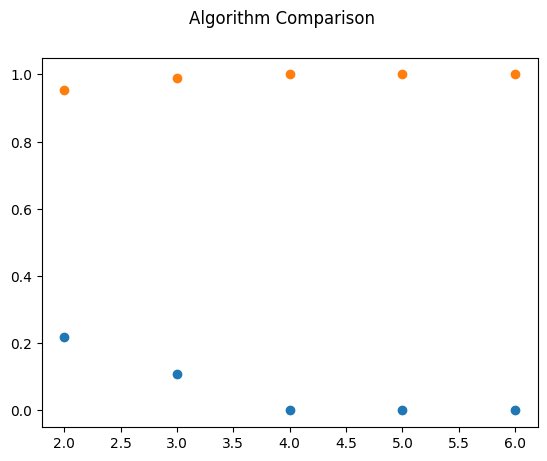

In [32]:
Deg = [2, 3, 4, 5, 6]
results_rmse = []
results_r2 = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    Standardised_data_X_poly = polynomial_features.fit_transform(Standardised_data_X_train)
    model = LinearRegression()
    model.fit(Standardised_data_X_poly, Standardised_data_Y_train)
    Standardised_data_Y_poly_pred = model.predict(Standardised_data_X_poly)
    rmse = np.sqrt(mean_squared_error(Standardised_data_Y_train, Standardised_data_Y_poly_pred))
    r2 = r2_score(Standardised_data_Y_train, Standardised_data_Y_poly_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    names.append(deg)
    print('Poly degree = ', deg)
    print('RMSE for Polynomial Regression: ', rmse)
    print('R2_score for Linear Regression: ', r2)
print('Names: ', names)
print("RMSE: ", results_rmse)
print('Names: ', names)
print('R2: ', results_r2)

plt.plot(names, results_rmse, 'o')
plt.plot(names, results_r2, 'o')
plt.suptitle('Algorithm Comparison')
plt.show()

Как показывает поиск по сетке для обучающего набора, наилучшим значением гиперпараметра является степень полиномиальной регрессии 4.

# 7) Для лучшей модели на лучшем наборе данных выполнить Grid поиск лучшего гиперпараметра регрессионной модели на тестовой выборке. Построить графики результатов поиска. Скорректировать значение лучшего гиперпараметра модели.


Poly degree =  2
RMSE for Polynomial Regression:  0.20555531119382978
R2_score for Linear Regression:  0.9583129329682634
Poly degree =  3
RMSE for Polynomial Regression:  1.4304988610720707e-12
R2_score for Linear Regression:  1.0
Poly degree =  4
RMSE for Polynomial Regression:  3.1233110571728496e-13
R2_score for Linear Regression:  1.0
Poly degree =  5
RMSE for Polynomial Regression:  1.5053141854681994e-12
R2_score for Linear Regression:  1.0
Poly degree =  6
RMSE for Polynomial Regression:  8.01967513128135e-12
R2_score for Linear Regression:  1.0
Names:  [2, 3, 4, 5, 6]
RMSE:  [0.20555531119382978, 1.4304988610720707e-12, 3.1233110571728496e-13, 1.5053141854681994e-12, 8.01967513128135e-12]
Names:  [2, 3, 4, 5, 6]
R2:  [0.9583129329682634, 1.0, 1.0, 1.0, 1.0]


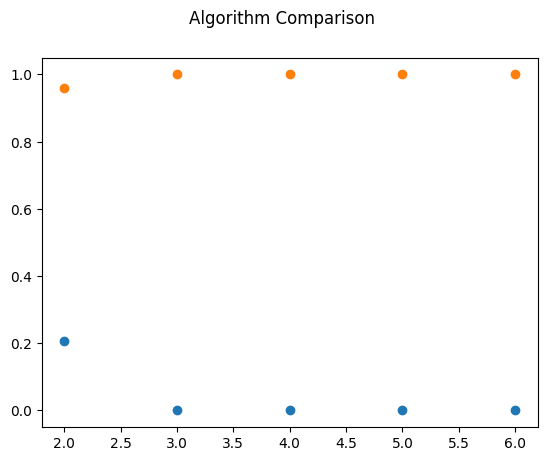

In [33]:
Deg = [2, 3, 4, 5, 6]
results_rmse = []
results_r2 = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    Standardised_data_X_poly = polynomial_features.fit_transform(Standardised_data_X_test)
    model = LinearRegression()
    model.fit(Standardised_data_X_poly, Standardised_data_Y_test)
    Standardised_data_X_poly_test = polynomial_features.fit_transform(Standardised_data_X_test)
    Standardised_data_Y_poly_pred = model.predict(Standardised_data_X_poly_test)
    rmse = np.sqrt(mean_squared_error(Standardised_data_Y_test, Standardised_data_Y_poly_pred))
    r2 = r2_score(Standardised_data_Y_test, Standardised_data_Y_poly_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    names.append(deg)
    print('Poly degree = ', deg)
    print('RMSE for Polynomial Regression: ', rmse)
    print('R2_score for Linear Regression: ', r2)
print('Names: ', names)
print("RMSE: ", results_rmse)
print('Names: ', names)
print('R2: ', results_r2)

plt.plot(names, results_rmse, 'o')
plt.plot(names, results_r2, 'o')
plt.suptitle('Algorithm Comparison')
plt.show()

Как показывает поиск по сетке для тестового набора, наилучшим значением гиперпараметра также является степень полиномиальной регрессии, равная 4.

# Выводы

В процессе выполнения лабораторной работы был выполнен разведочный анализ данных, выделен набор существенных признаков из данных , из наборов данных были получены тестовые и обучающие выборки, были созданы модели для исходного набора данных и набора существенных признаков из данных, основанные на линейной регрессии и полиномиальной регрессии. Была выделена лучшая модель на лучшем наборе данных (полиномиальная регрессия на исходном наборе данных). Для лучшей модели на лучшей модели данных был выполнен Grid поиск лучшего гиперпараметра на обучающей выборке (4) и скорректирован на тестовой выборке (4).